# Teena Bokde
# Data Science - Batch Oct 2024 (Pune) - Assignment 13

# Decision Tree

# Task 1: Data Preparation

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_excel('/content/heart_disease.xlsx')

In [9]:
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [10]:
df.columns

Index(['age', 'Age in years'], dtype='object')

In [11]:
df.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes


In [13]:
df.describe()

,age,Age in years
count,12,12
unique,12,12
top,Gender,"Gender ; Male - 1, Female -0"
freq,1,1


# Task 2: Exploratory Data Analysis (EDA)

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Checking for missing values

In [ ]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

Checking for outliers

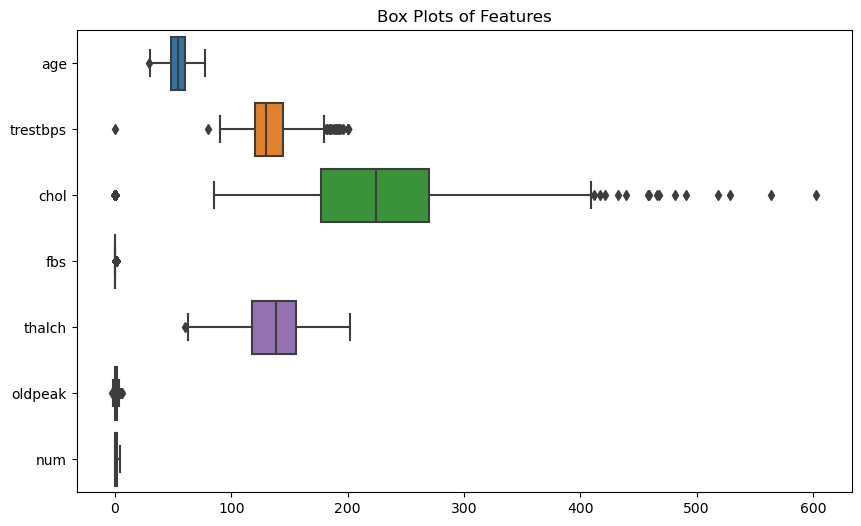

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h')
plt.title('Box Plots of Features')
plt.show()

Checking for inconsistencies

In [ ]:
df[df['age'] < 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


Visualizing the distribution of features

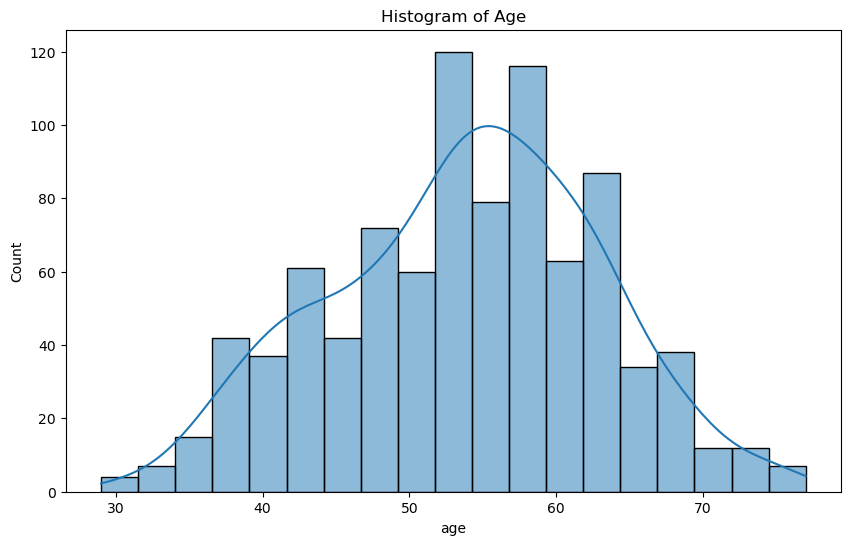

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True)
plt.title('Histogram of Age')
plt.show()

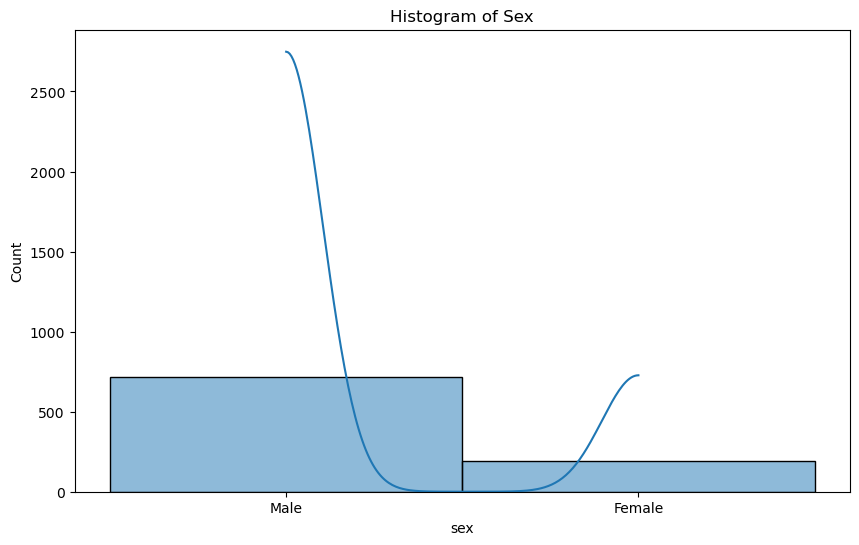

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sex', kde=True)
plt.title('Histogram of Sex')
plt.show()

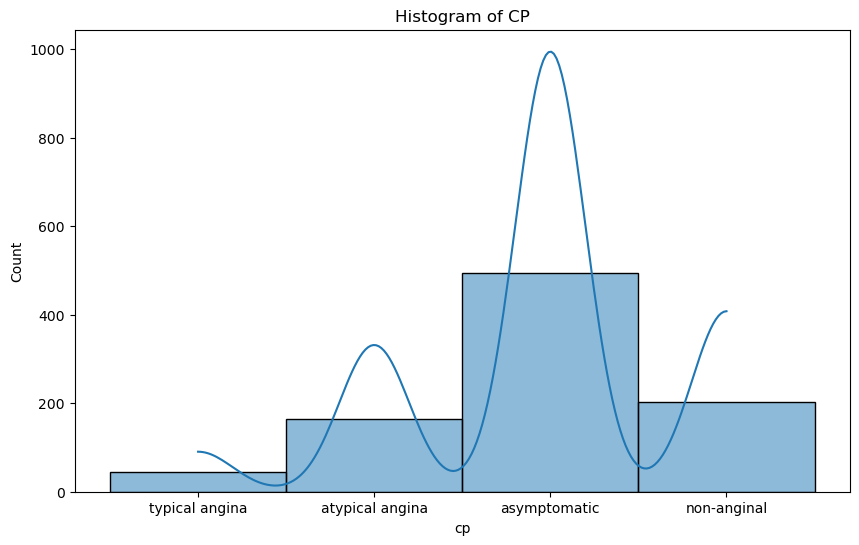

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='cp', kde=True)
plt.title('Histogram of CP')
plt.show()

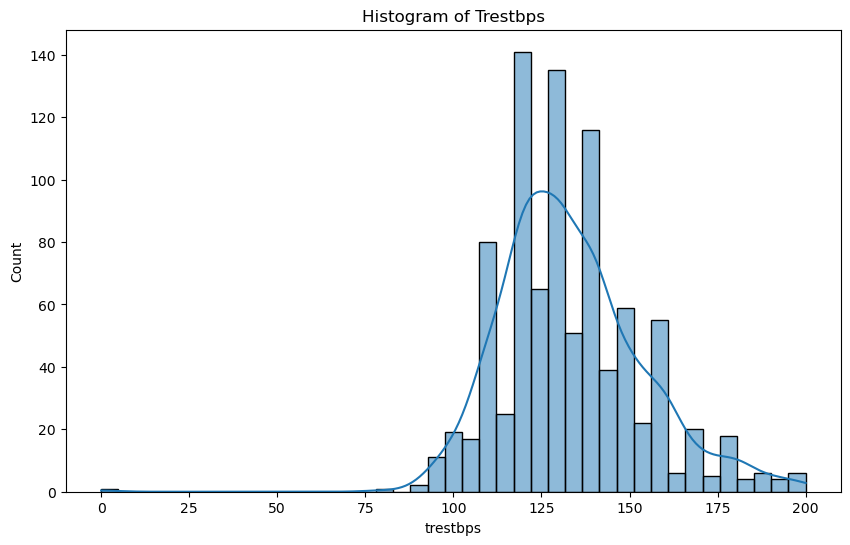

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='trestbps', kde=True)
plt.title('Histogram of Trestbps')
plt.show()

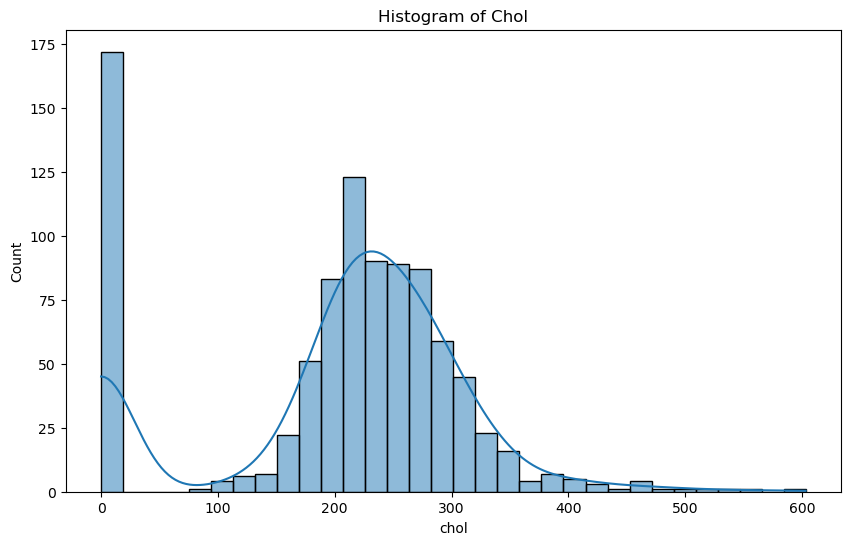

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='chol', kde=True)
plt.title('Histogram of Chol')
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


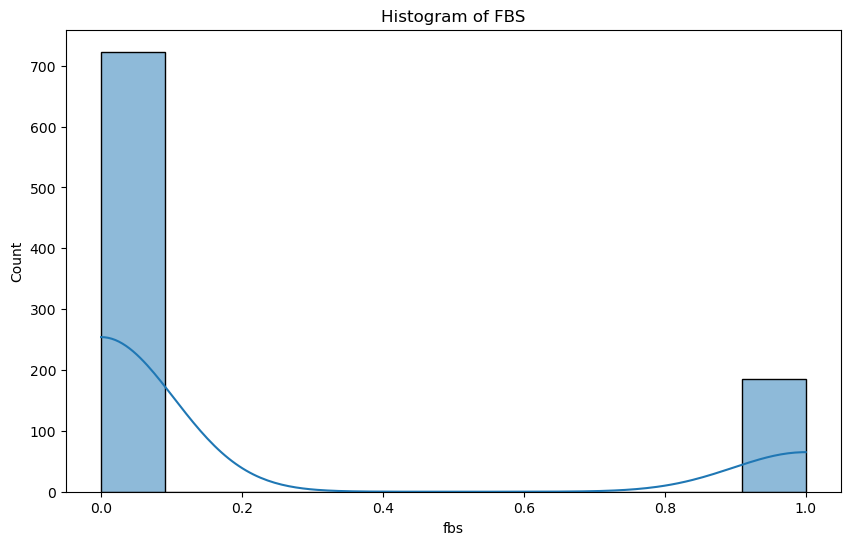

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='fbs', kde=True)
plt.title('Histogram of FBS')
plt.show()

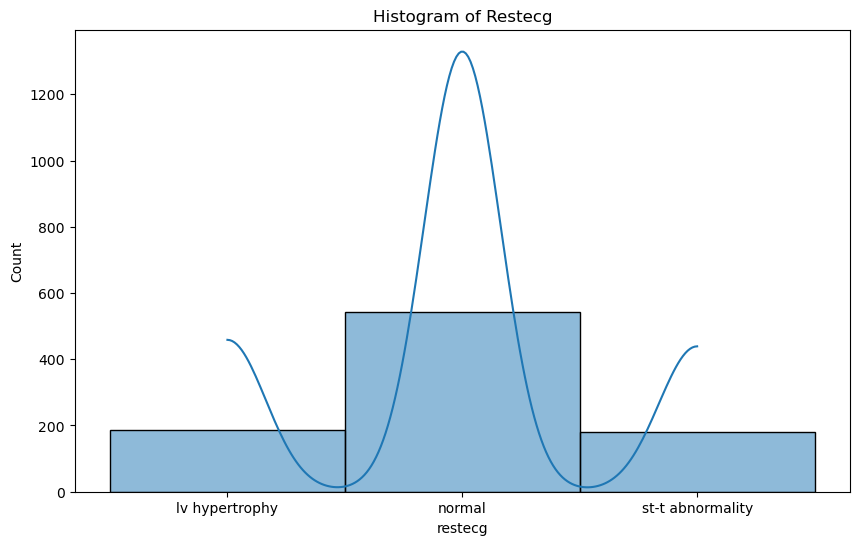

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='restecg', kde=True)
plt.title('Histogram of Restecg')
plt.show()

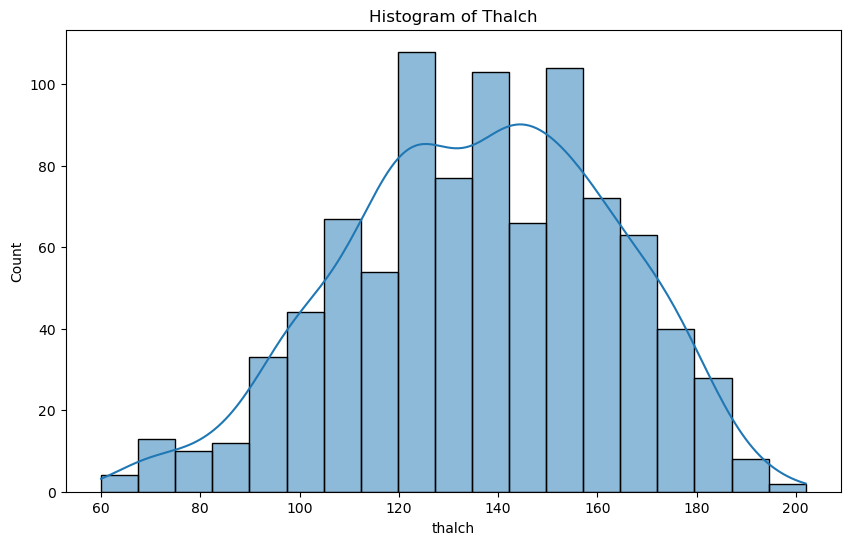

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='thalch', kde=True)
plt.title('Histogram of Thalch')
plt.show()

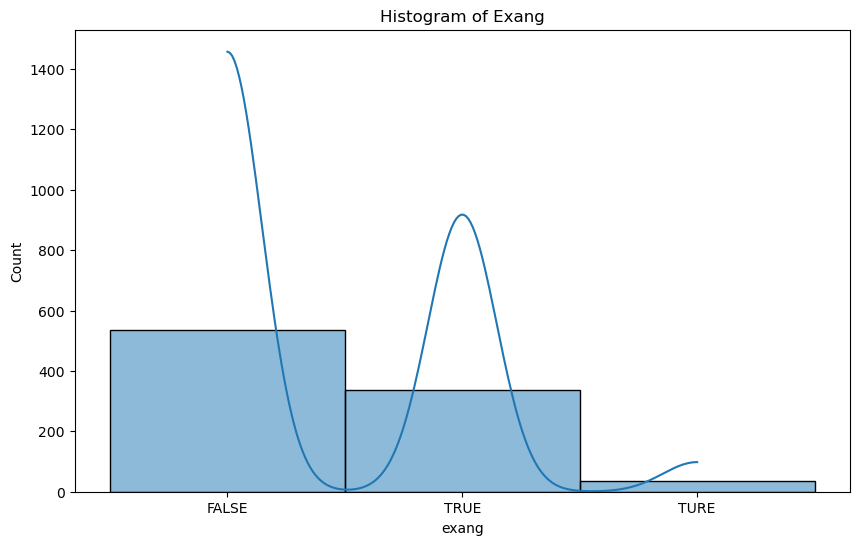

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='exang', kde=True)
plt.title('Histogram of Exang')
plt.show()

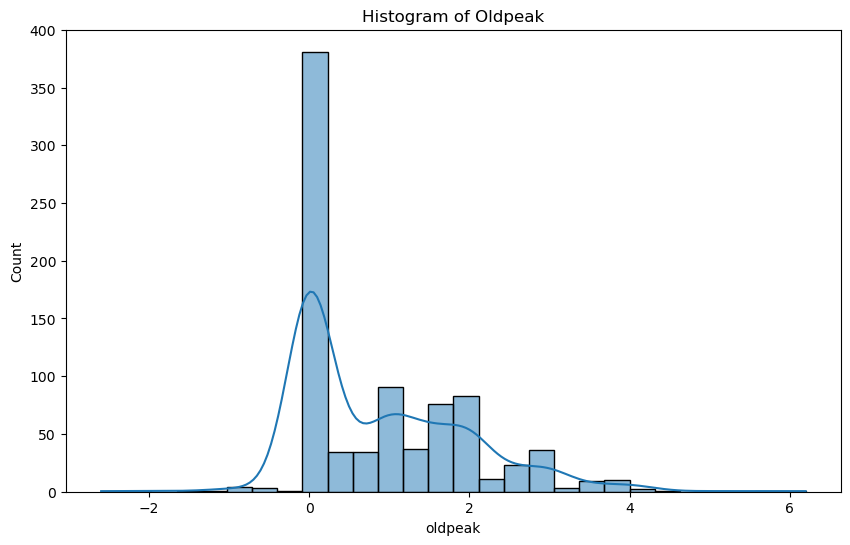

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='oldpeak', kde=True)
plt.title('Histogram of Oldpeak')
plt.show()

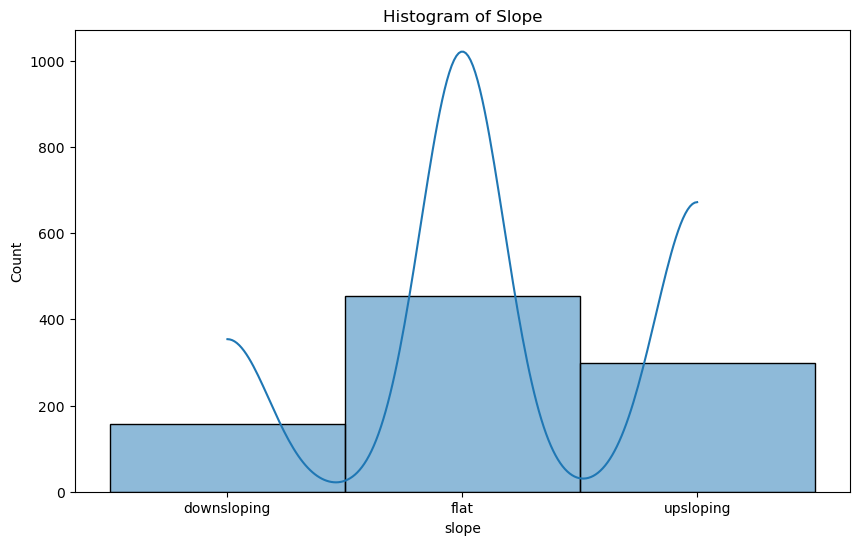

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='slope', kde=True)
plt.title('Histogram of Slope')
plt.show()

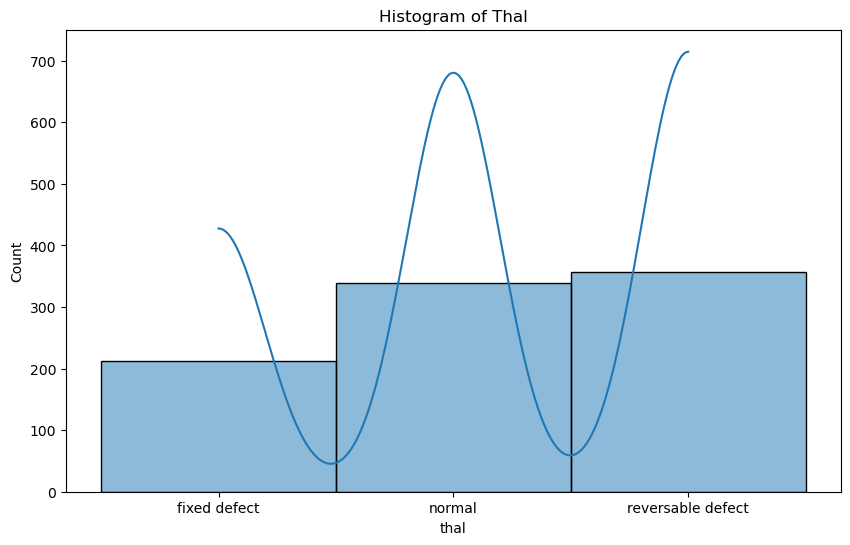

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='thal', kde=True)
plt.title('Histogram of Thal')
plt.show()

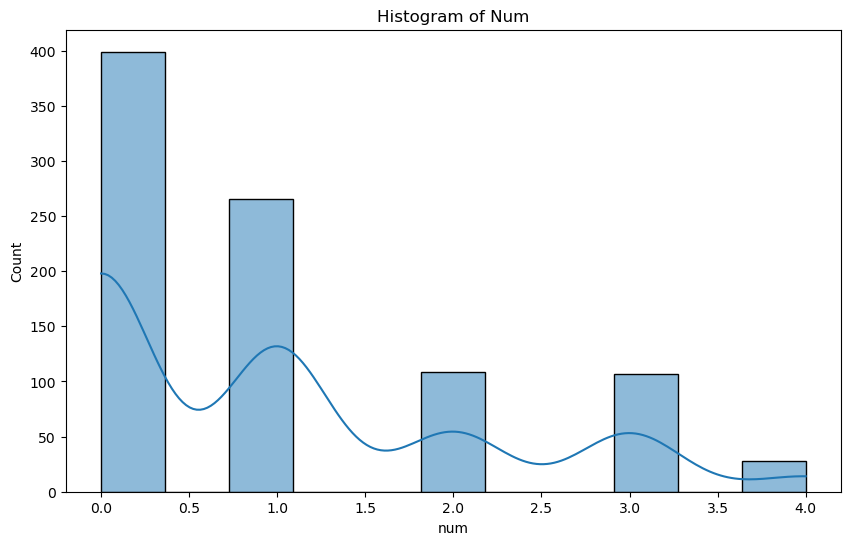

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='num', kde=True)
plt.title('Histogram of Num')
plt.show()

Correlation matrix

Selecting only numeric columns

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
numeric_df

,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233,150,2.3,0
1,41,135,203,132,0.0,0
2,57,140,192,148,0.4,0
3,52,118,186,190,0.0,0
4,57,110,201,126,1.5,0
...,...,...,...,...,...,...
903,53,125,0,120,1.5,4
904,62,166,170,120,3.0,4
905,56,170,0,123,2.5,4
906,56,144,208,105,NaN,4


Calculating the correlation matrix

In [ ]:
corr_matrix = numeric_df.corr()
corr_matrix

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.029898,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,-0.323058,0.437577,1.000000


Creating the heatmap

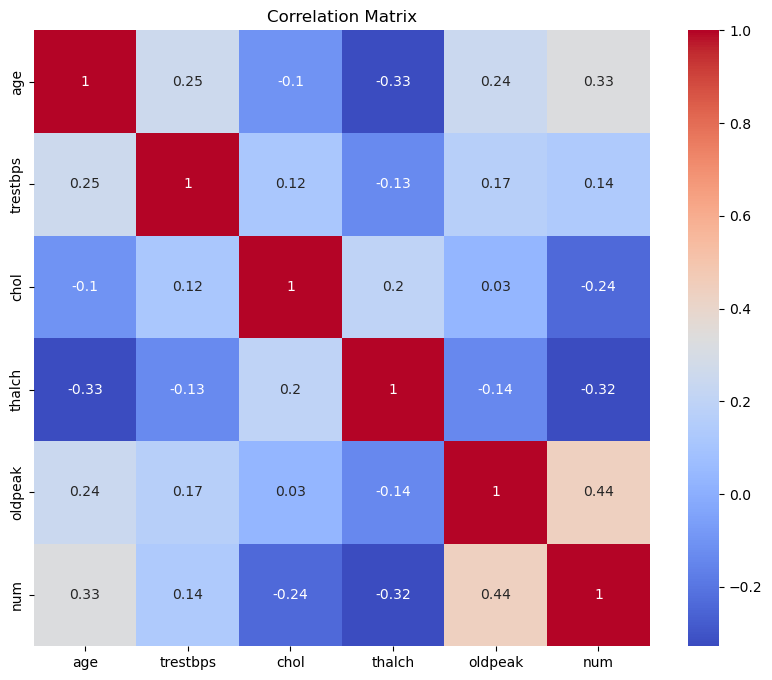

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Task 3: Feature Engineering

Importing necessary libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

Identifying categorical and numerical columns

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')
Numerical columns: Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')


Encoding categorical variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# assuming df is your DataFrame and categorical_cols are the categorical columns

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_cols])

# Use get_feature_names_out instead of get_feature_names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

In [ ]:
encoder

OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoded_data

<908x18 sparse matrix of type '<class 'numpy.float64'>'
	with 5448 stored elements in Compressed Sparse Row format>

In [ ]:
encoded_df

,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
904,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
905,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
906,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


Scaling numerical features

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])

scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

In [ ]:
scaler

StandardScaler()

In [ ]:
scaled_data

array([[ 1.00602683,  0.56739446,  0.28129674,  0.5241831 ,  1.28861197,
        -0.8819769 ],
       [-1.39756029,  0.07696688,  0.01352615, -0.14770527, -0.81524872,
        -0.8819769 ],
       [ 0.35050307,  0.32218067, -0.0846564 ,  0.44952884, -0.4493599 ,
        -0.8819769 ],
       ...,
       [ 0.24124911,  1.7934634 , -1.79838815, -0.48364946,  1.47155637,
         2.61511929],
       [ 0.24124911,  0.5183517 ,  0.05815458, -1.15553783,         nan,
         2.61511929],
       [ 0.35050307,  0.42026619,  0.67402693,  1.71865132,         nan,
         2.61511929]])

In [ ]:
scaled_df

,age,trestbps,chol,thalch,oldpeak,num
0,1.006027,0.567394,0.281297,0.524183,1.288612,-0.881977
1,-1.397560,0.076967,0.013526,-0.147705,-0.815249,-0.881977
2,0.350503,0.322181,-0.084656,0.449529,-0.449360,-0.881977
3,-0.195767,-0.756760,-0.138211,2.017268,-0.815249,-0.881977
4,0.350503,-1.149102,-0.004325,-0.371668,0.556834,-0.881977
...,...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,-0.595631,0.556834,2.615119
904,0.896773,1.597292,-0.281021,-0.595631,1.928917,2.615119
905,0.241249,1.793463,-1.798388,-0.483649,1.471556,2.615119
906,0.241249,0.518352,0.058155,-1.155538,NaN,2.615119


Handling missing values

In [ ]:
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(df[numerical_cols])

imputed_df = pd.DataFrame(imputed_data, columns=numerical_cols)

In [ ]:
imputer

SimpleImputer()

In [ ]:
imputed_data

array([[ 63.        , 145.        , 233.        , 150.        ,
          2.3       ,   0.        ],
       [ 41.        , 135.        , 203.        , 132.        ,
          0.        ,   0.        ],
       [ 57.        , 140.        , 192.        , 148.        ,
          0.4       ,   0.        ],
       ...,
       [ 56.        , 170.        ,   0.        , 123.        ,
          2.5       ,   4.        ],
       [ 56.        , 144.        , 208.        , 105.        ,
          0.89125296,   4.        ],
       [ 57.        , 142.        , 277.        , 182.        ,
          0.89125296,   4.        ]])

In [ ]:
imputed_df

,age,trestbps,chol,thalch,oldpeak,num
0,63.0,145.0,233.0,150.0,2.300000,0.0
1,41.0,135.0,203.0,132.0,0.000000,0.0
2,57.0,140.0,192.0,148.0,0.400000,0.0
3,52.0,118.0,186.0,190.0,0.000000,0.0
4,57.0,110.0,201.0,126.0,1.500000,0.0
...,...,...,...,...,...,...
903,53.0,125.0,0.0,120.0,1.500000,4.0
904,62.0,166.0,170.0,120.0,3.000000,4.0
905,56.0,170.0,0.0,123.0,2.500000,4.0
906,56.0,144.0,208.0,105.0,0.891253,4.0


Combining encoded, scaled, and imputed data

In [ ]:
engineered_df = pd.concat([encoded_df, scaled_df, imputed_df], axis=1)
engineered_df

,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_FALSE,...,chol,thalch,oldpeak,num,age,trestbps,chol,thalch,oldpeak,num
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.281297,0.524183,1.288612,-0.881977,63.0,145.0,233.0,150.0,2.300000,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.013526,-0.147705,-0.815249,-0.881977,41.0,135.0,203.0,132.0,0.000000,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,-0.084656,0.449529,-0.449360,-0.881977,57.0,140.0,192.0,148.0,0.400000,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,-0.138211,2.017268,-0.815249,-0.881977,52.0,118.0,186.0,190.0,0.000000,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.004325,-0.371668,0.556834,-0.881977,57.0,110.0,201.0,126.0,1.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,-1.798388,-0.595631,0.556834,2.615119,53.0,125.0,0.0,120.0,1.500000,4.0
904,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.281021,-0.595631,1.928917,2.615119,62.0,166.0,170.0,120.0,3.000000,4.0
905,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-1.798388,-0.483649,1.471556,2.615119,56.0,170.0,0.0,123.0,2.500000,4.0
906,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.058155,-1.155538,NaN,2.615119,56.0,144.0,208.0,105.0,0.891253,4.0


Creating a pipeline

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('scaler', StandardScaler(), numerical_cols),
        ('imputer', SimpleImputer(strategy='mean'), numerical_cols)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

Fit and transform the data

In [ ]:
engineered_data = pipeline.fit_transform(df)
engineered_data

array([[  0.        ,   1.        ,   0.        , ..., 150.        ,
          2.3       ,   0.        ],
       [  0.        ,   1.        ,   0.        , ..., 132.        ,
          0.        ,   0.        ],
       [  0.        ,   1.        ,   1.        , ..., 148.        ,
          0.4       ,   0.        ],
       ...,
       [  0.        ,   1.        ,   0.        , ..., 123.        ,
          2.5       ,   4.        ],
       [  0.        ,   1.        ,   0.        , ..., 105.        ,
          0.89125296,   4.        ],
       [  0.        ,   1.        ,   1.        , ..., 182.        ,
          0.89125296,   4.        ]])

# Task 4: Decision Tree Classification

Importing necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

Preprocessing the data

In [ ]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['cp'] = le.fit_transform(df['cp'])
df['fbs'] = le.fit_transform(df['fbs'])
df['restecg'] = le.fit_transform(df['restecg'])
df['exang'] = le.fit_transform(df['exang'])
df['slope'] = le.fit_transform(df['slope'])
df['thal'] = le.fit_transform(df['thal'])

In [ ]:
df['sex']

0      1
1      1
2      1
3      1
4      1
      ..
903    1
904    1
905    1
906    1
907    1
Name: sex, Length: 908, dtype: int32

In [ ]:
df['cp']

0      3
1      1
2      0
3      3
4      0
      ..
903    0
904    0
905    2
906    2
907    0
Name: cp, Length: 908, dtype: int32

In [ ]:
df['fbs']

0      1
1      0
2      0
3      0
4      0
      ..
903    0
904    0
905    0
906    1
907    1
Name: fbs, Length: 908, dtype: int64

In [ ]:
df['restecg']

0      0
1      1
2      1
3      0
4      1
      ..
903    1
904    2
905    0
906    2
907    2
Name: restecg, Length: 908, dtype: int32

In [ ]:
df['exang']

0      0
1      0
2      0
3      0
4      1
      ..
903    0
904    1
905    1
906    2
907    0
Name: exang, Length: 908, dtype: int32

In [ ]:
df['slope']

0      0
1      1
2      1
3      1
4      1
      ..
903    2
904    1
905    0
906    0
907    1
Name: slope, Length: 908, dtype: int32

In [ ]:
df['thal']

0      0
1      0
2      0
3      0
4      0
      ..
903    2
904    1
905    1
906    1
907    0
Name: thal, Length: 908, dtype: int32

Splitting the dataset into training and testing sets

In [ ]:
X = df.drop('num', axis=1)  # features
Y = df['num']  # target variable

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2
904,62,1,0,166,170,0,2,120,1,3.0,1,1
905,56,1,2,170,0,0,0,123,1,2.5,0,1
906,56,1,2,144,208,1,2,105,2,NaN,0,1


In [ ]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
84,42,1,1,120,295,0,1,162,0,0.0,2,1
10,30,0,3,170,237,0,2,170,0,0.0,0,0
617,74,1,2,140,237,1,1,94,0,0.0,2,1
250,41,1,0,104,0,0,2,111,0,0.0,1,0
869,49,1,2,137,142,0,1,68,0,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,63,0,2,135,252,0,0,172,0,0.0,2,1
270,37,0,1,120,260,0,1,130,0,0.0,0,1
860,48,1,0,140,374,0,1,159,1,1.5,2,0
435,57,1,1,154,232,0,0,164,0,0.0,2,1


In [ ]:
Y_train

84     0
10     0
617    1
250    0
869    3
      ..
106    0
270    0
860    3
435    1
102    0
Name: num, Length: 726, dtype: int64

In [ ]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
865,63,1,2,130,0,0,2,111,1,0.0,1,2
439,58,1,0,170,0,1,2,105,1,0.0,0,1
342,41,1,1,120,291,0,2,160,0,0.0,0,0
736,61,1,0,146,241,0,1,148,1,3.0,0,0
785,54,1,0,110,206,0,0,108,1,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
580,52,1,0,140,266,0,1,134,1,2.0,1,1
868,65,1,0,126,312,0,0,156,0,NaN,0,0
445,53,1,0,140,203,1,0,155,1,3.1,0,2
786,54,1,0,122,286,0,0,116,1,3.2,1,1


In [ ]:
Y_test

865    3
439    1
342    0
736    2
785    3
      ..
580    1
868    3
445    1
786    3
25     0
Name: num, Length: 182, dtype: int64

Implementing a Decision Tree Classification model

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf

DecisionTreeClassifier(random_state=42)

Training the model on the training set

In [ ]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

Evaluating the model on the testing set

In [ ]:
Y_pred1 = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        89
           1       0.61      0.75      0.67        48
           2       0.80      0.55      0.65        22
           3       0.78      0.41      0.54        17
           4       0.00      0.00      0.00         6

    accuracy                           0.76       182
   macro avg       0.61      0.53      0.55       182
weighted avg       0.75      0.76      0.74       182



C:\Users\PAVAN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PAVAN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PAVAN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Task 5: Hyperparameter Tuning

Importing necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

Defining hyperparameter tuning space

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

Performing hyperparameter tuning using GridSearchCV

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

Getting the best hyperparameters and the corresponding model

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
best_params

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}

In [ ]:
best_model

DecisionTreeClassifier(min_samples_split=5, random_state=42)

Evaluating the best model on the testing set

In [ ]:
Y_pred = best_model.predict(X_test)

In [ ]:
Y_pred

array([3, 1, 0, 4, 1, 0, 2, 0, 1, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 3, 4, 0, 2,
       2, 0, 1, 0, 0, 3, 3, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 1, 1, 0, 2,
       3, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 2, 0, 4, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 0, 1, 0, 4,
       1, 1, 2, 3, 1, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

# Calculate ROC-AUC score for multiclass problems
y_pred_proba = best_model.predict_proba(X_test)
roc_auc = roc_auc_score(Y_test, y_pred_proba, multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.532967032967033
Precision: 0.2858276851682237
Recall: 0.28491958581185284
F1-score: 0.2795284336125921
ROC-AUC: 0.5918096645268298


# Task 6: Model Evaluation and Analysis

Importing necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Visualizing the decision tree structure

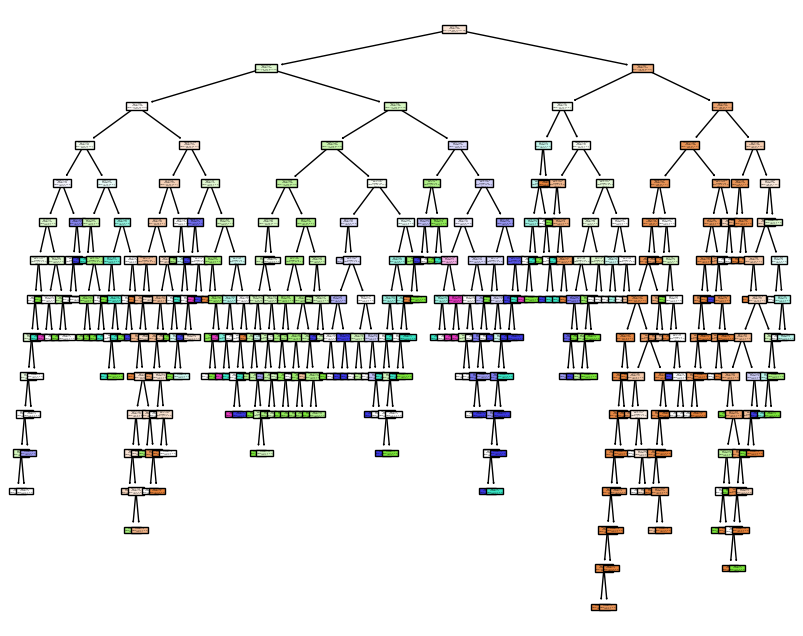

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np

# Assuming X is your feature data and y is your target data
clf = DecisionTreeClassifier()
clf = clf.fit(X, Y)

class_names = np.unique(Y).astype(str).tolist()

plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=class_names, filled=True)
plt.show()

In [ ]:
feature_importances = clf.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.2f}")

Feature Importances:
age: nan
sex: 0.04
cp: 0.10
trestbps: nan
chol: nan
fbs: nan
restecg: nan
thalch: nan
exang: nan
oldpeak: nan
slope: nan
thal: nan
